<a href="https://colab.research.google.com/github/murselcr/forecasting-time-series/blob/main/forecasting_linear_reggression_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from numpy import array

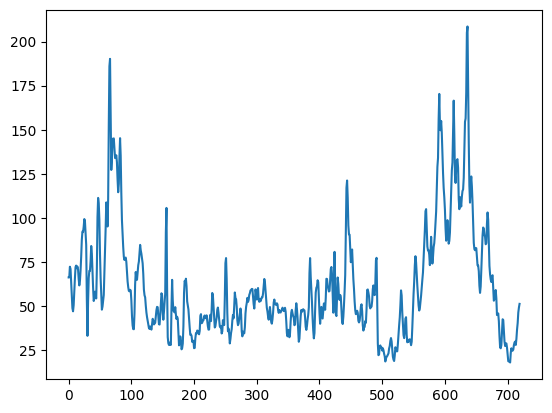

In [ ]:
dataset = pd.read_excel('eskişehir hava durumu.xlsx', usecols=[1] )
dataset["ET"] = [float(str(i).replace(",", ".")) for i in dataset["ET"]]
plt.plot(dataset)
plt.show()

In [ ]:
dataset= dataset.values
dataset= dataset.astype('float32')

In [ ]:
train_size = int(len(dataset) * 0.7)
train_data, test_data = dataset[0:train_size], dataset[train_size:len(dataset)]
print("Eğitim veri seti boyutu:", len(train_data))
print("Test veri seti boyutu:", len(test_data))

Eğitim veri seti boyutu: 503
Test veri seti boyutu: 217


In [ ]:
import numpy as np

In [ ]:
def create_dataset(dataset, look_back=1):
  datax,datay= [],[]
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    datax.append(a)
    datay.append(dataset[i+look_back,0])
  return np.array(datax), np.array(datay)

In [ ]:
look_back=1
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)
print(len(trainX), len(trainY))
print(len(testX), len(testY))
print(testY)

501 501
215 215
[ 21.49  18.57  20.25  21.19  21.65  22.38  23.15  25.94  27.33  30.26
  31.85  29.94  25.56  21.24  19.65  18.82  21.91  26.63  25.93  24.31
  24.34  28.61  34.31  39.08  43.61  50.47  58.88  56.03  46.25  39.56
  33.53  31.81  36.13  42.8   43.68  33.72  29.44  30.92  29.75  30.73
  31.16  29.97  27.79  29.72  37.88  47.87  56.86  63.96  73.21  78.26
  74.87  68.2   61.52  56.07  50.37  47.45  48.72  52.25  55.91  60.76
  64.93  69.07  77.04  83.79  93.03 103.75 104.96  95.08  83.75  81.51
  81.68  79.08  73.21  79.8   89.26  80.46  74.1   77.96  83.46  85.68
  90.8   97.49 103.61 116.84 128.93 134.04 156.26 170.32 154.04 149.72
 155.   148.25 135.9  125.45 117.   111.73 104.69  94.07  87.06  91.64
  98.7   91.56  85.39  86.93  91.76 103.13 114.74 126.92 131.42 148.87
 166.51 147.07 124.09 119.83 128.43 132.72 133.32 128.4  110.86 104.94
 111.76 109.01 106.47 112.01 115.21 116.16 122.68 139.23 154.51 156.44
 171.23 205.02 208.58 174.89 143.25 118.17 108.67 119.38 123.

In [ ]:
for i in range (len(trainX)):
  print(trainX[i],trainY[i])

[66.23] 66.26
[66.26] 72.29
[72.29] 71.03
[71.03] 63.44
[63.44] 55.74
[55.74] 48.85
[48.85] 47.02
[47.02] 50.49
[50.49] 58.74
[58.74] 65.73
[65.73] 72.11
[72.11] 72.96
[72.96] 71.42
[71.42] 72.42
[72.42] 70.89
[70.89] 65.41
[65.41] 61.71
[61.71] 64.17
[64.17] 70.1
[70.1] 78.0
[78.] 87.58
[87.58] 92.29
[92.29] 91.93
[91.93] 95.02
[95.02] 99.35
[99.35] 98.03
[98.03] 91.35
[91.35] 84.74
[84.74] 53.81
[53.81] 33.1
[33.1] 52.73
[52.73] 65.89
[65.89] 69.98
[69.98] 69.95
[69.95] 75.46
[75.46] 84.06
[84.06] 79.8
[79.8] 69.92
[69.92] 60.29
[60.29] 52.88
[52.88] 54.51
[54.51] 58.15
[58.15] 55.47
[55.47] 54.33
[54.33] 71.39
[71.39] 100.45
[100.45] 111.34
[111.34] 108.42
[108.42] 98.95
[98.95] 79.22
[79.22] 65.76
[65.76] 56.67
[56.67] 47.96
[47.96] 49.71
[49.71] 52.96
[52.96] 56.27
[56.27] 68.8
[68.8] 80.58
[80.58] 94.05
[94.05] 108.78
[108.78] 106.7
[106.7] 95.13
[95.13] 110.81
[110.81] 152.61
[152.61] 185.97
[185.97] 190.21
[190.21] 157.82
[157.82] 127.21
[127.21] 133.71
[133.71] 144.89
[144.89]

In [ ]:
from statsmodels.regression import linear_model

In [ ]:
model1 = linear_model.OLS(trainY,trainX)
results = model1.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.002e+04
Date:                Wed, 22 May 2024   Prob (F-statistic):                        0.00
Time:                        16:41:13   Log-Likelihood:                         -1746.8
No. Observations:                 501   AIC:                                      3496.
Df Residuals:                     500   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

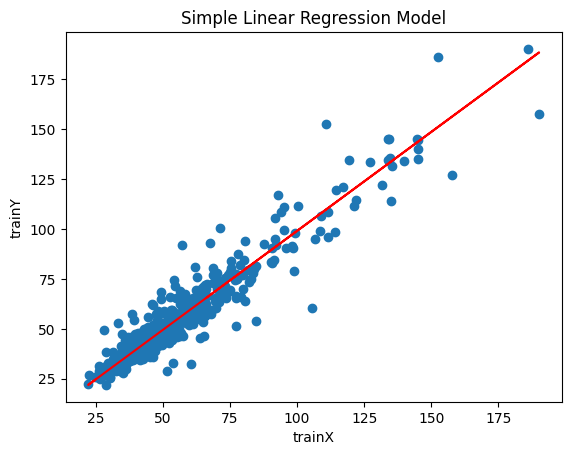

In [ ]:
predicted_y = results.predict(trainX)
plt.scatter(trainX[:, 0], trainY)  # Assuming the first column of trainX is the feature
plt.plot(trainX[:, 0], predicted_y, color='red')  # Assuming the first column of trainX is the feature
plt.xlabel("trainX")
plt.ylabel("trainY")
plt.title("Simple Linear Regression Model")
# Show the plot
plt.show()

[ 22.729324  21.292639  18.399456  20.064028  20.995396  21.45117
  22.174465  22.937393  25.701773  27.079006  29.982098  31.557495
  29.665037  25.32526   21.044935  19.469538  18.64716   21.708782
  26.385433  25.691864  24.08674   24.116467  28.347252  33.994904
  38.7211    43.209496  50.006493  58.339256  55.51543   45.82525
  39.19669   33.222065  31.517862  35.79819   42.406933  43.27885
  33.410324  29.169628  30.636036  29.476782  30.44778   30.873833
  29.69476   27.534782  29.447056  37.532116  47.43037   56.337807
  63.3726    72.53765   77.541275  74.18241   67.57366   60.955013
  55.55506   49.90741   47.01423   48.272564  51.770145  55.396534
  60.20199   64.333694  68.43568   76.33248   83.020485  92.17563
 102.79718  103.99606   94.2068    82.98086   80.76143   80.92986
  78.353745  72.53765   79.06713   88.440254  79.72107   73.41948
  77.244026  82.69352   84.89313   89.96611   96.594666 102.65846
 115.76696  127.745926 132.80899  154.82494  168.75581  152.62532
 14

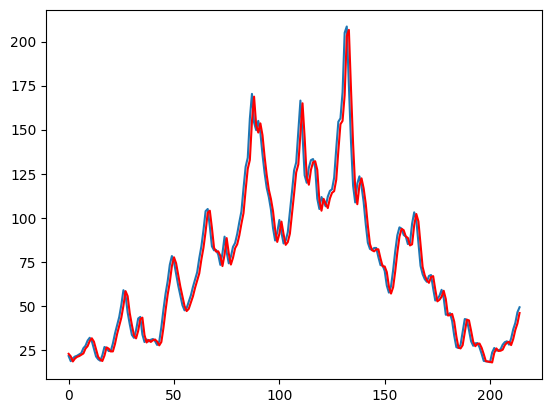

In [ ]:
prediction_linear = results.predict(testX)
print(prediction_linear)
print("mae_linear:", mean_absolute_error(testY, prediction_linear))
print("mse_linear:", mean_squared_error(testY, prediction_linear))
print("mape_linear:", mean_absolute_percentage_error(testY, prediction_linear))
# plot forecasts against actual outcomes
plt.plot(testY)
plt.plot(prediction_linear, color='red')
plt.show()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.002e+04
Date:                Sun, 19 May 2024   Prob (F-statistic):                        0.00
Time:                        12:47:44   Log-Likelihood:                         -1746.8
No. Observations:                 501   AIC:                                      3496.
Df Residuals:                     500   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

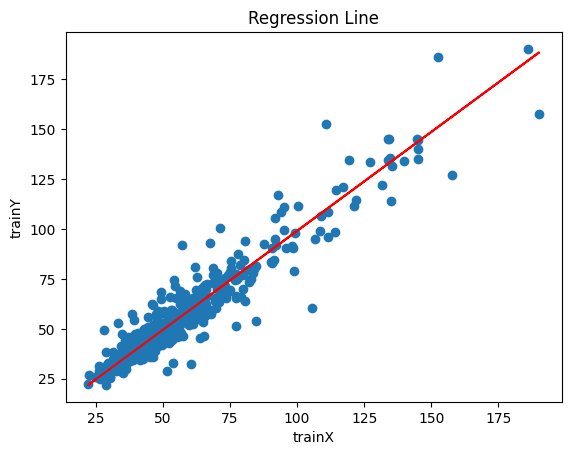

[ 22.729324  21.292639  18.399456  20.064028  20.995396  21.45117
  22.174465  22.937393  25.701773  27.079006  29.982098  31.557495
  29.665037  25.32526   21.044935  19.469538  18.64716   21.708782
  26.385433  25.691864  24.08674   24.116467  28.347252  33.994904
  38.7211    43.209496  50.006493  58.339256  55.51543   45.82525
  39.19669   33.222065  31.517862  35.79819   42.406933  43.27885
  33.410324  29.169628  30.636036  29.476782  30.44778   30.873833
  29.69476   27.534782  29.447056  37.532116  47.43037   56.337807
  63.3726    72.53765   77.541275  74.18241   67.57366   60.955013
  55.55506   49.90741   47.01423   48.272564  51.770145  55.396534
  60.20199   64.333694  68.43568   76.33248   83.020485  92.17563
 102.79718  103.99606   94.2068    82.98086   80.76143   80.92986
  78.353745  72.53765   79.06713   88.440254  79.72107   73.41948
  77.244026  82.69352   84.89313   89.96611   96.594666 102.65846
 115.76696  127.745926 132.80899  154.82494  168.75581  152.62532
 14

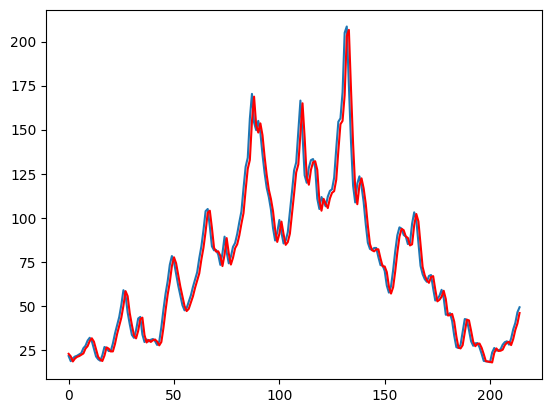

In [ ]:
from statsmodels.regression import linear_model
model1 = linear_model.OLS(trainY,trainX)
results = model1.fit()
print(results.summary())
predicted_y = results.predict(trainX)
plt.scatter(trainX[:, 0], trainY)  # Assuming the first column of trainX is the feature
plt.plot(trainX[:, 0], predicted_y, color='red')  # Assuming the first column of trainX is the feature
plt.scatter(trainX)
plt.xlabel("trainX"[:, 0], trainY)
plt.ylabel("trainY")
plt.title("Regression Line")
# Show the plot
plt.show()
prediction_linear = results.predict(testX)
print(prediction_linear)
print("mae_linear:", mean_absolute_error(testY, prediction_linear))
print("mse_linear:", mean_squared_error(testY, prediction_linear))
print("mape_linear:", mean_absolute_percentage_error(testY, prediction_linear))
# plot forecasts against actual outcomes
plt.plot(testY)
plt.plot(prediction_linear, color='red')
plt.show()

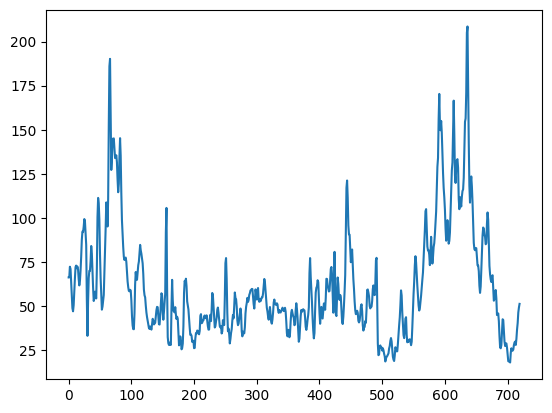

Eğitim veri seti boyutu: 503
Test veri seti boyutu: 217


In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
dataset = pd.read_excel('eskişehir hava durumu.xlsx', usecols=[1] )
dataset["ET"] = [float(str(i).replace(",", ".")) for i in dataset["ET"]]
plt.plot(dataset)
plt.show()
dataset= dataset.values
dataset= dataset.astype('float32')
scaler = MinMaxScaler()
dataset =  scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.7)
# Eğitim ve test veri kümelerini oluştur
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("Eğitim veri seti boyutu:", len(train_data))
print("Test veri seti boyutu:", len(test_data))

In [ ]:
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model3=Sequential()
model3.add(LSTM(4,input_shape=(1,look_back)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')
model3.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
501/501 - 3s - loss: 3688.5442 - 3s/epoch - 6ms/step
Epoch 2/10
501/501 - 1s - loss: 3556.8962 - 1s/epoch - 2ms/step
Epoch 3/10
501/501 - 1s - loss: 3434.0859 - 1s/epoch - 2ms/step
Epoch 4/10
501/501 - 1s - loss: 3316.0098 - 782ms/epoch - 2ms/step
Epoch 5/10
501/501 - 1s - loss: 3201.5720 - 779ms/epoch - 2ms/step
Epoch 6/10
501/501 - 1s - loss: 3090.4641 - 790ms/epoch - 2ms/step
Epoch 7/10
501/501 - 1s - loss: 2982.5132 - 794ms/epoch - 2ms/step
Epoch 8/10
501/501 - 1s - loss: 2877.2429 - 799ms/epoch - 2ms/step
Epoch 9/10
501/501 - 1s - loss: 2775.2781 - 784ms/epoch - 2ms/step
Epoch 10/10
501/501 - 1s - loss: 2676.2417 - 805ms/epoch - 2ms/step


In [ ]:
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

7/7 [==============================] - 0s 4ms/step


In [ ]:
prediction_lstm = scaler.inverse_transform(testPredict .reshape(-1, 1))
testPredict=scaler.inverse_transform(testY.reshape(-1, 1))

In [ ]:
print("mae_lstm:", mean_absolute_error(testY, prediction_lstm))
print("mse_lstm:", mean_squared_error(testY, prediction_lstm))
print("mape_lstm:", mean_absolute_percentage_error(testY,  prediction_lstm))

mae_lstm: 2176.543
mse_lstm: 4739101.0
mape_lstm: 44.379402


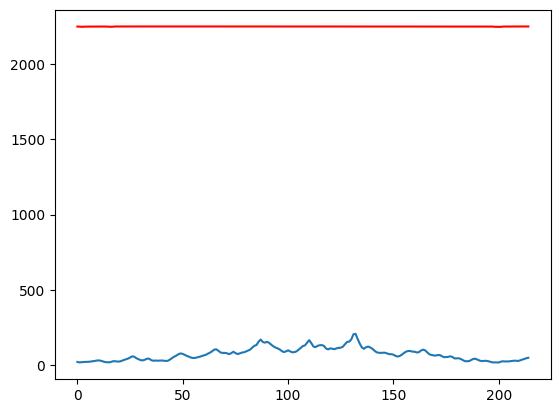

In [ ]:
plt.plot(testY)
plt.plot(prediction_lstm, color='red')
plt.show()

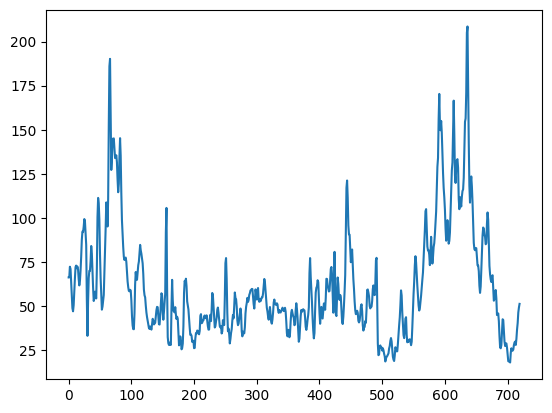

In [ ]:

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_excel('eskişehir hava durumu.xlsx', usecols=[1] )
dataset["ET"] = [float(str(i).replace(",", ".")) for i in dataset["ET"]]
plt.plot(dataset)
plt.show()


In [ ]:
dataset= dataset.values
dataset= dataset.astype('float32')


In [ ]:
scaler = MinMaxScaler()
dataset =  scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.7)


In [ ]:
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("Eğitim veri seti boyutu:", len(train_data))
print("Test veri seti boyutu:", len(test_data))


Eğitim veri seti boyutu: 503
Test veri seti boyutu: 217


In [ ]:
import numpy as np

In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)
look_back=1
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)
print(len(trainX), len(trainY))
print(len(testX), len(testY))
testY = scaler.inverse_transform(testY.reshape(-1, 1))
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=0.1)  # Example hyperparameters, adjust as needed
svr.fit(trainX, trainY)
prediction_svr = svr.predict(testX)
prediction_svr = scaler.inverse_transform(prediction_svr.reshape(-1, 1))
print("mae_svr:", mean_absolute_error(testY, prediction_svr))
print("mse_svr:", mean_squared_error(testY, prediction_svr))
print("mape_svr:", mean_absolute_percentage_error(testY, prediction_svr))


501 501
215 215
mae_svr: 6.09641030748145
mse_svr: 70.49550758252683
mape_svr: 0.09207935288397517


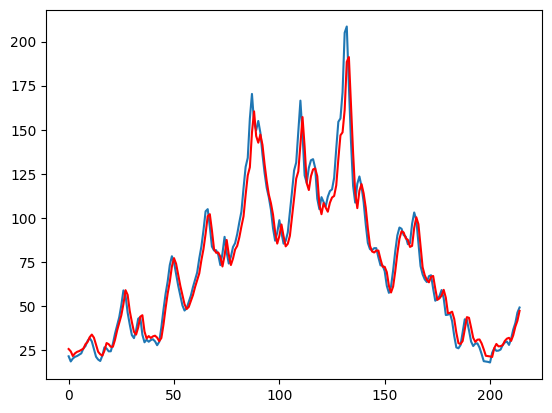

In [ ]:
plt.plot(testY)
plt.plot(prediction_svr, color='red')
